In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import librosa
import numpy as np
import pandas as pd

In [2]:
font1 = {'family':'serif','color':'black','size':12}
font1_1 = {'family':'serif','color':'black','size':20}
font2 = {'family':'cursive','color':'black','size':14}
font3 = {'family':'fantasy','color':'black','size':11}
font4 = {'family':'monospace','color':'black','size':11}
font5 = {'family':'sans','color':'black','size':11}

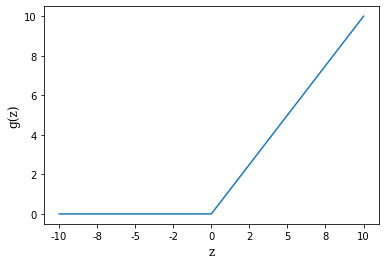

In [7]:
def rectified(x):
    return max(0, x)
 
series_in = [x for x in range(-10, 11)]
series_out = [rectified(x) for x in series_in]

plt.plot(series_in, series_out)
plt.xlabel("z",fontdict=font1)
plt.ylabel("g(z)",fontdict=font1)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
# plt.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# plt.title("g(z)=max(0,z)",fontdict=font2)
plt.show()

(-1.0, 1.0)

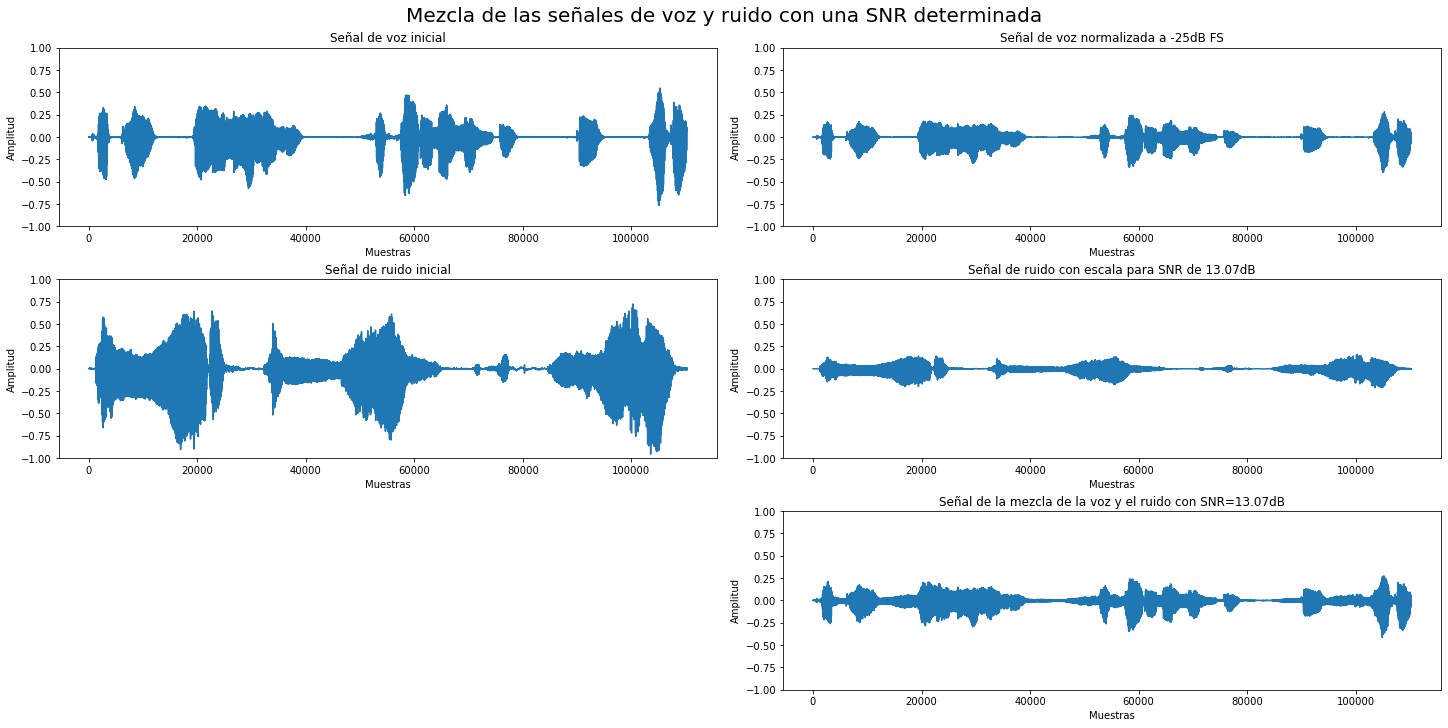

In [8]:
clean_o_pth = "/users/clarae/desktop/Speech_Enhancement-TG/Librivox/Audio/quijote_vol2_14_cervantes_64kb_46.wav"
clean_n_pth = "/users/clarae/desktop/Clean1/Audio/nquijote_vol2_14_cervantes_64kb_46.wav"
noise_o_pth = "/users/clarae/desktop/Speech_Enhancement-TG/ESC-50/audio/4-167077-B-20.wav"
mix_pth = "/users/clarae/desktop/Mixed1/Audio/22000_M_Jc-Guan_4-167077-B-20_13.07dB.wav"
Sn=0.222075185

clean_o,_ = librosa.load(clean_o_pth)
clean_n,_ = librosa.load(clean_n_pth)
noise_o,_ = librosa.load(noise_o_pth)
noise_n = noise_o*Sn
mix,_ = librosa.load(mix_pth)

# fig_mix = plt.figure()
fig_mix = plt.figure(figsize=(20,10),constrained_layout=True)
fig_mix.suptitle("Mezcla de las señales de voz y ruido con una SNR determinada",fontsize=20)
gs = fig_mix.add_gridspec(3, 2)

cl_o = fig_mix.add_subplot(gs[0, 0])
cl_o.plot(clean_o)
cl_o.set_title("Señal de voz inicial",fontsize=12)#fontdict=font1)
cl_o.set_ylabel("Amplitud")
cl_o.set_xlabel("Muestras")
cl_o.set_ylim([-1,1])

cl_n = fig_mix.add_subplot(gs[0,1])
cl_n.plot(clean_n)
cl_n.set_title("Señal de voz normalizada a -25dB FS",fontsize=12)#fontdict=font1)
cl_n.set_ylabel("Amplitud")
cl_n.set_xlabel("Muestras")
cl_n.set_ylim([-1,1])

ns_o = fig_mix.add_subplot(gs[1, 0])
ns_o.plot(noise_o)
ns_o.set_title("Señal de ruido inicial",fontsize=12)
ns_o.set_ylabel("Amplitud")
ns_o.set_xlabel("Muestras")
ns_o.set_ylim([-1,1])

ns_n = fig_mix.add_subplot(gs[1,1])
ns_n.plot(noise_n)
ns_n.set_title("Señal de ruido con escala para SNR de 13.07dB",fontsize=12)#fontdict=font1)
ns_n.set_ylabel("Amplitud")
ns_n.set_xlabel("Muestras")
ns_n.set_ylim([-1,1])

mx = fig_mix.add_subplot(gs[2,1])
mx.plot(mix)
mx.set_title("Señal de la mezcla de la voz y el ruido con SNR=13.07dB",fontsize=12)#fontdict=font1)
mx.set_ylabel("Amplitud")
mx.set_xlabel("Muestras")
mx.set_ylim([-1,1])

/var/folders/r_/cy_03ks53dqct2cfqhx8b3sc0000gn/T/ipykernel_63956/380967328.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.ax.set_yticklabels(["{:.0f}dB".format(i) for i in cb.get_ticks()])


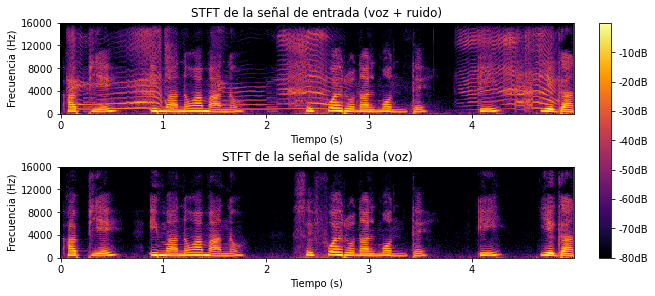

In [36]:
clean_pth = "/users/clarae/desktop/Clean1/Audio/nquijote_vol2_14_cervantes_64kb_46.wav"
mix_pth = "/users/clarae/desktop/Mixed1/Audio/22000_M_Jc-Guan_4-167077-B-20_13.07dB.wav"

# clean_pth = "/users/clarae/desktop/Clean1/Audio/nlacondenada_02_blasco_64kb_95.wav"
# mix_pth = "/users/clarae/desktop/Mixed1/Audio/19491_F_Marian-Martin_5-204741-A-46_3.2dB.wav"

mix,Fs= librosa.load(mix_pth,sr=16000)
stft_mx, _ = librosa.magphase(librosa.stft(mix, n_fft=320, hop_length=160, win_length=320))
db_mx=librosa.amplitude_to_db(stft_mx,ref=np.max)
clean,_=librosa.load(clean_pth,sr=16000)
stft_cl,_=librosa.magphase(librosa.stft(clean, n_fft=320,hop_length=160,win_length=320))
db_cl=librosa.amplitude_to_db(stft_cl,ref=np.max)

t=np.arange(0,5,5/stft_mx.shape[1])
f=np.arange(0,Fs,Fs/stft_mx.shape[0])

fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(9,4),constrained_layout=True)
# fig.suptitle("STFT de una pareja de audios de entrada y salida para alimentar el modelo",fontsize=16)
im=axes[0].pcolormesh(t, f, db_mx, cmap='inferno')
axes[0].set_title("STFT de la señal de entrada (voz + ruido)",fontsize=12)
axes[0].set_ylabel("Frecuencia (Hz)")
axes[0].set_xlabel("Tiempo (s)")
axes[0].set_yticks([0,4000,8000,12000,16000])

im=axes[1].pcolormesh(t, f, db_cl, cmap='inferno')
axes[1].set_title("STFT de la señal de salida (voz)",fontsize=12)
axes[1].set_ylabel("Frecuencia (Hz)")
axes[1].set_xlabel("Tiempo (s)")
axes[1].set_yticks([0,4000,8000,12000,16000])

cb=fig.colorbar(im, ax=axes.ravel().tolist(),)
cb.ax.set_yticklabels(["{:.4f}dB".format(i) for i in cb.get_ticks()])

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

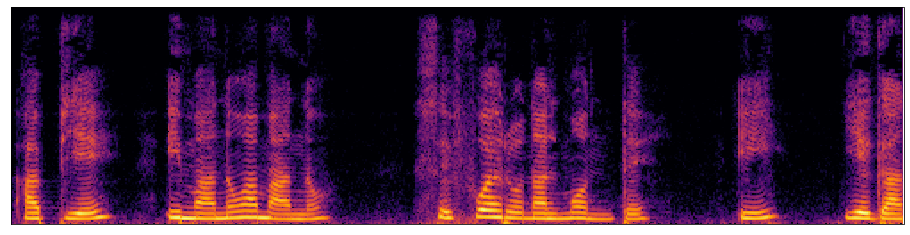

In [43]:
plt.figure(figsize=(16,4))
plt.pcolormesh(t, f, db_cl, cmap='inferno')
plt.xticks([], [])
plt.yticks([], [])
plt.show

Text(0.5, 1.0, 'Pérdidas de entrenamiento y validación')

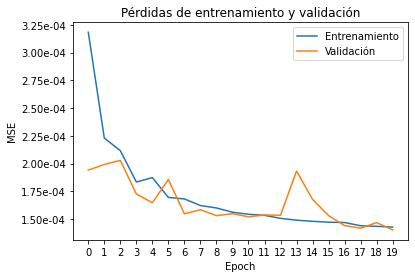

In [2]:
df=pd.read_csv("/Users/clarae/Desktop/TG_Audio_Inteligente/Model1/mod1-05_22_2022_21:14:30history.csv",header=0)
df=df.rename(columns={ df.columns[0]: "epoch" })
plt.figure(figsize=(6,4))

plt.plot(df["epoch"],df["loss"],label="Entrenamiento")
plt.plot(df["epoch"],df["val_loss"],label="Validación")
plt.xticks(df["epoch"])
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2e}'))
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Pérdidas de entrenamiento y validación")

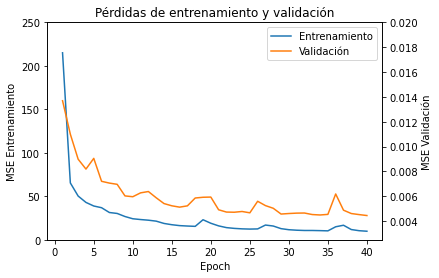

In [44]:
df1=pd.read_csv("/Users/clarae/Desktop/TG_Audio_Inteligente/run-.-tag-Loss_Train.csv",header=0)
df1=df1[["Step","Value"]]
df2=pd.read_csv("/Users/clarae/Desktop/TG_Audio_Inteligente/run-.-tag-Loss_Validation.csv",header=0)
df2=df2[["Step","Value"]]
df2.head()

fig = plt.figure()
ax = fig.add_subplot(111)

lns1 = ax.plot(df1["Step"],df1["Value"], color="tab:blue", label = 'Entrenamiento')
ax2 = ax.twinx()
lns3 = ax2.plot(df2["Step"],df2["Value"], color="tab:orange", label = 'Validación')

lns = lns1+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

ax.set_xlabel("Epoch")
ax.set_ylabel("MSE Entrenamiento")
ax2.set_ylabel("MSE Validación")
ax2.set_ylim(0.0025,0.02)
ax.set_ylim(0, 250)

plt.title("Pérdidas de entrenamiento y validación")
plt.show()

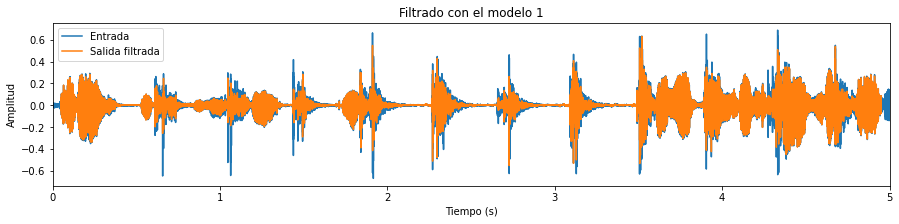

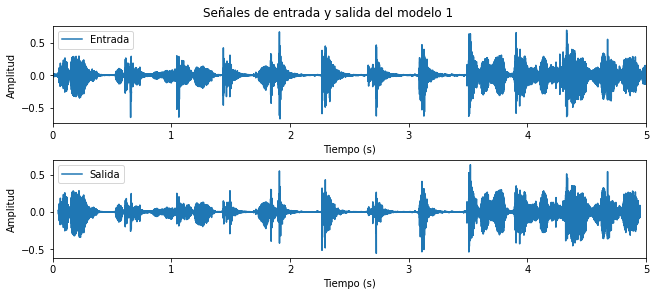

In [2]:
clean_pth = "/users/clarae/desktop/Clean/ncienmejorespoesias_075_menendezypelayo_64kb_47.wav"
mix_pth = "/users/clarae/desktop/Speech_Enhancement-TG/Mixed/Audio/889_F_Diana-Valentin_2-76408-A-22_3.54dB.wav"
enhanced_pth="/users/clarae/desktop/Output_perceptron/enhanced/m1_889_F_Diana-Valentin_2-76408-A-22_nhcd.wav"


mix,_= librosa.load(mix_pth,sr=22050)
clean,_=librosa.load(clean_pth,sr=22050)
enhanced,_=librosa.load(enhanced_pth,sr=22050)

t=np.arange(0,5,5/clean.shape[0])
t2=t[1102:-1102]

plt.figure(figsize=(15,3))
plt.plot(t,mix ,label='Entrada')
plt.plot(t2,enhanced, label='Salida filtrada')
plt.title("Filtrado con el modelo 1")
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.xlim([0,5])
plt.legend()
plt.show()

fig2, axes = plt.subplots(nrows=2, ncols=1,figsize=(9,4),constrained_layout=True)
fig2.suptitle("Señales de entrada y salida del modelo 1")
axes[0].plot(t, mix, label='Entrada')
axes[0].set_ylabel("Amplitud")
axes[0].set_xlabel("Tiempo (s)")
axes[0].set_xlim([0,5])
axes[0].legend()

axes[1].plot(t2, enhanced, label='Salida')
axes[1].set_ylabel("Amplitud")
axes[1].set_xlabel("Tiempo (s)")
axes[1].set_xlim([0,5])
axes[1].legend()

plt.show()

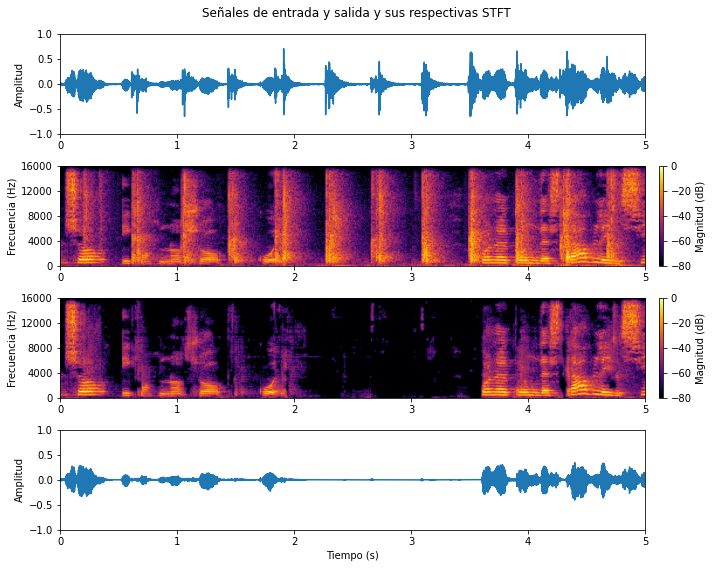

In [86]:
mix_pth = "/users/clarae/desktop/Speech_Enhancement-TG/Mixed/Audio/889_F_Diana-Valentin_2-76408-A-22_3.54dB.wav"
enhanced_pth="/users/clarae/desktop/Output_crn/enhanced/889_F_Diana-Valentin_2-76408-A-22_3.54dB.wav"


mix,_= librosa.load(mix_pth,sr=22050)
enhanced,_=librosa.load(enhanced_pth,sr=22050)

mix,Fs= librosa.load(mix_pth,sr=16000)
stft_mx, _ = librosa.magphase(librosa.stft(mix, n_fft=320, hop_length=160, win_length=320))
db_mx=librosa.amplitude_to_db(stft_mx,ref=np.max)
enhanced,_=librosa.load(enhanced_pth,sr=16000)
stft_en,_=librosa.magphase(librosa.stft(enhanced, n_fft=320,hop_length=160,win_length=320))
db_en=librosa.amplitude_to_db(stft_en,ref=np.max)

t=np.arange(0,5,5/stft_mx.shape[1])
f=np.arange(0,Fs,Fs/stft_mx.shape[0])

t1=np.arange(0,5,5/mix.shape[0])

t2=np.arange(0,5,5/stft_en.shape[1])
f2=np.arange(0,Fs,Fs/stft_en.shape[0])



fig, ax = plt.subplots(4, 2, gridspec_kw={'width_ratios': [1, 0.0075], 'height_ratios': [1.5, 1.5,1.5,1.5]}, figsize=(10, 8))
fig.suptitle("Señales de entrada y salida y sus respectivas STFT")

im = ax[0, 0].plot(t1,mix)
# ax[0, 0].set_xlabel('Tiempo (s)')
ax[0, 0].set_ylabel('Amplitud')
ax[0, 0].set_xlim([0, 5])
ax[0, 0].set_ylim([-1, 1])
ax[0, 1].set_axis_off()

im = ax[1, 0].imshow(db_mx, cmap='inferno', aspect='auto', origin='lower', extent=[t[0], 5, f[0], f[-1]])
plt.colorbar(im, cax=ax[1, 1])
# ax[1, 0].set_xlabel('Tiempo (s)')
ax[1, 0].set_ylabel('Frecuencia (Hz)')
ax[1, 0].set_yticks([0,4000,8000,12000,16000])
ax[1, 1].set_ylabel('Magnitud (dB)')

im2 = ax[2, 0].imshow(db_en, cmap='inferno', aspect='auto', origin='lower', extent=[t2[0], 5, f2[0], f2[-1]])
plt.colorbar(im2, cax=ax[2, 1])
# ax[2, 0].set_xlabel('Tiempo (s)')
ax[2, 0].set_ylabel('Frecuencia (Hz)')
ax[2, 0].set_yticks([0,4000,8000,12000,16000])
ax[2, 1].set_ylabel('Magnitud (dB)')


im = ax[3, 0].plot(t1,enhanced)
ax[3, 0].set_xlabel('Tiempo (s)')
ax[3, 0].set_ylabel('Amplitud')
ax[3, 0].set_xlim([0, 5])
ax[3, 0].set_ylim([-1, 1])
ax[3, 1].set_axis_off()

plt.tight_layout()


In [14]:
###Results
csv="/Users/clarae/Desktop/TG_Audio_Inteligente/Evaluation/measurements.csv"
results_df=pd.read_csv(csv,header=0)
print(results_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3695 entries, 0 to 3694
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mixed_file   3695 non-null   object 
 1   clean_file   3695 non-null   object 
 2   model1_file  3695 non-null   object 
 3   model2_file  3695 non-null   object 
 4   snr_org      3695 non-null   float64
 5   sdr_org      3695 non-null   float64
 6   pesq_org     3695 non-null   float64
 7   stoi_org     3695 non-null   float64
 8   snr_m1       3695 non-null   float64
 9   sdr_m1       3695 non-null   float64
 10  pesq_m1      3695 non-null   float64
 11  stoi_m1      3695 non-null   float64
 12  snr_m2       3695 non-null   float64
 13  sdr_m2       3695 non-null   float64
 14  pesq_m2      3695 non-null   float64
 15  stoi_m2      3695 non-null   float64
dtypes: float64(12), object(4)
memory usage: 462.0+ KB
None


In [16]:
###Results
csv="/Users/clarae/Desktop/TG_Audio_Inteligente/Evaluation/measurements.csv"
results_df=pd.read_csv(csv,header=0)

def groups(row):
    if row["snr_org"]<5: return "[0,5)"
    elif row["snr_org"]<10: return "[5,10)"
    elif row["snr_org"]<15: return "[10,15)"
    elif row["snr_org"]<20: return "[15,20)"
    else: return "[20,25)"

results_df["range"]=results_df.apply (lambda row: groups(row), axis=1)

In [75]:
group_snr=results_df[["range","snr_org", "sdr_org","pesq_org", "stoi_org", "snr_m1", "sdr_m1", "pesq_m1", "stoi_m1", "snr_m2", "sdr_m2", "pesq_m2", "stoi_m2"]]
group_snr2=group_snr.copy()
ranges=group_snr.copy()
group_snr2["range_idx"]=ranges["range"]

group_snr2.set_index("range_idx",inplace=True)
group_snr2.groupby(level=0).mean()
group_snr2.sort_index()
group_snr2=group_snr2.reset_index() #(inplace=True)
group_snr2.head()

,range_idx,range,snr_org,sdr_org,pesq_org,stoi_org,snr_m1,sdr_m1,pesq_m1,stoi_m1,snr_m2,sdr_m2,pesq_m2,stoi_m2
0,"[20,25)","[20,25)",22.645,22.638547,1.025704,0.997009,17.581379,18.244102,0.986645,0.986645,22.947828,22.939248,0.997086,0.997086
1,"[15,20)","[15,20)",18.240,18.248947,1.024041,0.957312,18.914663,18.861428,0.958026,0.958029,21.058613,21.028719,0.973201,0.973201
2,"[5,10)","[5,10)",7.025,6.935939,1.044238,0.949787,10.510330,10.117958,0.932528,0.932523,12.770709,12.537860,0.929473,0.929473
3,"[15,20)","[15,20)",18.440,18.439859,1.104955,0.998249,15.658218,15.730109,0.979453,0.979427,22.470383,22.556720,0.992562,0.992562
4,"[10,15)","[10,15)",12.655,12.639688,1.036596,0.975943,10.022268,9.766200,0.950834,0.950835,13.630342,13.532674,0.977169,0.977169
